In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Classification
===============

Get some data to play with

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['target_names', 'images', 'DESCR', 'data', 'target'])

In [3]:
digits.images.shape

(1797, 8, 8)

In [4]:
print(digits.images[0])

[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]


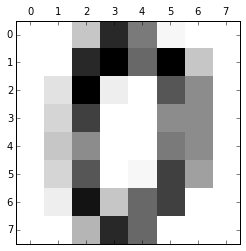

In [5]:
plt.matshow(digits.images[0], cmap=plt.cm.Greys)

In [6]:
digits.data.shape

(1797, 64)

In [7]:
digits.target.shape

(1797,)

In [8]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

**Data is always a numpy array (or sparse matrix) of shape (n_samples, n_features)**

Split the data to get going

In [9]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

Really Simple API
-------------------
0) Import your model class

In [10]:
from sklearn.svm import LinearSVC

1) Instantiate an object and set the parameters

In [11]:
svm = LinearSVC(C=0.1)

2) Fit the model

In [12]:
svm.fit(X_train, y_train)

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

3) Apply / evaluate

In [13]:
print(svm.predict(X_train))
print(y_train)

[0 7 3 ..., 0 1 2]
[0 7 3 ..., 0 1 2]


In [14]:
svm.score(X_train, y_train)

0.99480326651818862

In [15]:
svm.score(X_test, y_test)

0.95999999999999996

And again
---------

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
rf = RandomForestClassifier(n_estimators=50)

In [18]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [19]:
rf.predict(X_test)

array([5, 9, 5, 7, 2, 9, 9, 2, 8, 3, 3, 0, 8, 3, 0, 1, 1, 7, 8, 7, 9, 3, 3,
       2, 9, 1, 4, 9, 0, 1, 2, 8, 3, 5, 4, 1, 6, 8, 9, 2, 1, 2, 6, 0, 2, 8,
       4, 0, 1, 2, 4, 5, 0, 0, 9, 4, 1, 2, 2, 8, 4, 4, 4, 8, 7, 0, 0, 6, 1,
       8, 3, 9, 3, 1, 2, 3, 7, 2, 2, 1, 7, 4, 1, 2, 8, 1, 1, 4, 5, 2, 8, 4,
       1, 9, 6, 4, 7, 4, 6, 4, 0, 4, 4, 7, 7, 1, 8, 6, 3, 4, 5, 4, 2, 6, 1,
       8, 9, 6, 0, 9, 6, 0, 7, 7, 7, 0, 0, 5, 0, 7, 1, 5, 9, 1, 3, 3, 8, 1,
       5, 3, 2, 0, 6, 6, 5, 8, 5, 1, 4, 9, 2, 7, 5, 3, 6, 6, 5, 0, 4, 2, 4,
       0, 8, 8, 2, 2, 5, 5, 7, 6, 2, 5, 7, 9, 9, 0, 0, 7, 0, 6, 6, 7, 5, 9,
       3, 4, 3, 2, 9, 8, 5, 7, 8, 1, 9, 8, 7, 6, 3, 7, 4, 3, 0, 8, 9, 1, 1,
       9, 3, 9, 5, 8, 3, 5, 9, 9, 0, 7, 0, 5, 1, 3, 1, 8, 3, 2, 7, 5, 3, 4,
       4, 2, 0, 5, 1, 1, 6, 1, 6, 8, 9, 4, 2, 1, 8, 6, 3, 1, 1, 3, 4, 7, 2,
       2, 6, 8, 1, 5, 8, 9, 0, 1, 7, 5, 6, 3, 8, 6, 3, 3, 5, 4, 6, 2, 3, 4,
       9, 0, 1, 6, 6, 9, 0, 1, 9, 7, 9, 8, 1, 0, 7, 8, 5, 9, 9, 7, 1, 3, 6,
       5, 1,

In [20]:
rf.score(X_test, y_test)

0.96888888888888891

<h1>Classifier Comparison</h1>
<img src="classifier_comparison.png" width=100%>

Labels Can Be Anything
=============================

In [21]:
numbers = np.array(["zero", "one", "two", "three", "four", "five", "six", "seven", "eight", "nine"])

In [22]:
y_train_string = numbers[y_train]
svm.fit(X_train, y_train_string)

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [23]:
svm.predict(X_test)

array(['five', 'nine', 'five', 'seven', 'two', 'nine', 'nine', 'two',
       'eight', 'three', 'three', 'zero', 'eight', 'three', 'zero', 'one',
       'one', 'seven', 'eight', 'seven', 'nine', 'three', 'three', 'two',
       'nine', 'one', 'four', 'nine', 'zero', 'one', 'two', 'eight',
       'three', 'five', 'four', 'one', 'six', 'eight', 'nine', 'two',
       'one', 'two', 'six', 'zero', 'two', 'two', 'four', 'zero', 'one',
       'two', 'four', 'five', 'zero', 'zero', 'nine', 'four', 'one', 'two',
       'two', 'eight', 'four', 'four', 'four', 'four', 'seven', 'zero',
       'zero', 'six', 'one', 'eight', 'three', 'nine', 'three', 'one',
       'two', 'three', 'seven', 'two', 'two', 'one', 'seven', 'four',
       'one', 'two', 'eight', 'one', 'one', 'four', 'five', 'two', 'eight',
       'four', 'one', 'nine', 'six', 'four', 'seven', 'four', 'six',
       'four', 'zero', 'four', 'four', 'seven', 'seven', 'three', 'one',
       'six', 'three', 'four', 'five', 'four', 'two', 'six', '